<a href="https://colab.research.google.com/github/saketh269/INFO-5731---Computational-Methods-for-Information-Systems/blob/main/Mekala_SakethReddy_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
df = pd.read_csv('sentimental_reviews.csv')

# Preprocess the text data (replace 'text_column' with the name of your text column)
text_data = df['Review Title'].tolist()

# Create a CountVectorizer to convert text data to a matrix of token counts
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(text_data)

# Define the number of topics
num_topics = 10

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', random_state=42)
lda_model.fit(X)

# Get the top words for each topic
feature_names = vectorizer.get_feature_names_out()
top_words = 10
topic_keywords = {}
for topic_idx, topic in enumerate(lda_model.components_):
    top_indices = topic.argsort()[:-top_words - 1:-1]
    topic_keywords[topic_idx] = [feature_names[i] for i in top_indices]

# Print the features (text representation) used for topic modeling
print("Features (text representation) used for topic modeling:")
print(", ".join(feature_names))
print()

# Print the top 10 clusters and their summaries
for topic_idx, keywords in topic_keywords.items():
    print(f"Cluster {topic_idx + 1}:")
    print("Keywords:", ', '.join(keywords))
    # Generate a summary or description for each cluster based on the top keywords
    summary = ""
    if "overrated" in keywords or "complicated" in keywords:
        summary += "This topic seems to explore critical or mixed sentiments regarding certain aspects of the data. "
    elif "masterpiece" in keywords or "exceptional" in keywords:
        summary += "This topic appears to represent overwhelmingly positive sentiments towards specific films or cinematic experiences. "
    else:
        summary += "This cluster's topic is not explicitly clear. "

    # Add more specific descriptions based on other keywords or patterns in the cluster
    if "Oppenheimer" in keywords:
        summary += "Keywords such as 'Oppenheimer' alongside other terms suggest discussions related to historical or scientific themes, possibly critiquing certain portrayals or interpretations."

    print("Description:", summary)
    print()

# If you have the human-meaningful documents, you can also use them to further interpret the clusters.


Features (text representation) used for topic modeling:
10, 2023, absolute, absolutely, academy, accurate, achievement, acted, acting, action, actors, amazing, american, art, artistic, astonishing, astounding, atomic, attention, audience, awards, away, awe, awesome, background, bad, bag, beautiful, believe, best, better, bio, biography, biopic, biopics, bit, blast, bleak, blown, board, bomb, bombastic, bombs, boom, bore, bored, boring, box, breathtaking, brilliance, brilliant, brilliantly, captivating, cast, cgi, chain, challenging, changed, character, chilling, chris, christopher, cillian, cinema, cinematic, classic, come, compelling, complex, complicated, concept, confusing, courtroom, crafted, create, created, cuts, dark, date, day, days, deadly, death, decade, decent, definitely, delivered, delivers, deserves, deserving, destroy, destroyer, dialogue, did, didn, different, direction, disappointed, disappointing, disappointment, discovery, documentary, does, doesn, don, downey, downs

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

1)
TF-IDF Vectorization: This specifically addresses the influence that the words in titles have over the whole dataset in the Netflix reviews, thus including the words which are of the greatest sentiment relevance, while relocating the common words far down on the list.

Stop Words Removal: Considers as minor words like “the” and “is”, which only have very little emotion's information, and leaves them out, which is to deal with noise data.

Lowercasing: The lowercase normalizes words ease downcases all words to the lowercase version, consequently, words are uniformly features representations, and dimensionality is reduced.

Max Features Limitation: Controls the number of words which are used for TF-IDF vectorization by eliminating the less informative, this helps in the classification of sentiments and avoiding overfitting.

Document Frequency Thresholding: Takes into account the minimum and maximum frequencies for words in the vocabulary so that it does not retain only the commonly-used words or an unusual word that is not likely for sentiment analysis to focus on.


In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load dataset
data = pd.read_csv('sentimental_reviews.csv')  # Replace 'sentimental_reviews.csv' with the path to your dataset

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data['Review Title'], data['sentiment_category'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True, stop_words='english', max_df=0.5, min_df=10)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

feature_names = tfidf_vectorizer.get_feature_names_out()

# Print the first 20 features
print("Features extracted from TF-IDF:")
print(feature_names)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC()
}

# Perform 5-fold cross-validation for each classifier and evaluate performance
for clf_name, clf in classifiers.items():
    print(f"\nClassifier: {clf_name}")

    # Train the classifier
    clf.fit(X_train_tfidf, y_train)

    # Predict on test set
    y_pred = clf.predict(X_test_tfidf)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_tfidf, y_train, cv=5)
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    logistic_accuracy = accuracy_score(y_test, y_pred)


Features extracted from TF-IDF:
['acting' 'amazing' 'best' 'biopic' 'bomb' 'boring' 'brilliant'
 'christopher' 'cinema' 'cinematic' 'death' 'destroyer' 'disappointing'
 'don' 'epic' 'excellent' 'experience' 'film' 'good' 'great' 'history'
 'just' 'like' 'long' 'masterpiece' 'movie' 'murphy' 'nolan' 'oppenheimer'
 'overrated' 'story' 'time' 'watch' 'worlds' 'year']

Classifier: Logistic Regression
Accuracy: 0.6150
Precision: 0.6715
Recall: 0.6150
F1 Score: 0.6035
Mean Cross-Validation Accuracy: 0.6000

Classifier: Support Vector Machine
Accuracy: 0.6250
Precision: 0.6698
Recall: 0.6250
F1 Score: 0.6118
Mean Cross-Validation Accuracy: 0.6013


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

2.

  Overall Quality (OverallQual): This refers to the general build quality and the overall finishing of the house, which normally drive the cost of a property. Cottages with better overall quality rankings get higher in comparison to others in the market.

  Living Area (GrLivArea): The space of living area in the house is the main thing which affects the cost of the house. Such spaces as bigger living areas normally correlate with higher prices as they allow for accommodating members of the family as well as different activities.

  Garage Area (GarageArea): The dimension of the garage is an important point that many buyers tend to consider. The size of a garage tends to address more of storage or parking need which it might increase its value.

  Total Basement Area (TotalBsmtSF): The size of basement is the next essential element which determines how much the house is worth. Such as a bigger basement will provide additional living space or storage spaces making the house more comfortable and valuable.

  Year Built (YearBuilt): While the year when the house was built can impact its sale price either positively or negatively due to historical attributes like architectural style, construction quality, and historical significance. Newer homes commonly are considered as being higher in value than older ones in a comparable situation.

  Neighborhood (Neighborhood): The neighborhood in which the house is located can make a valuable contribution to its higher price. As things like closeness to amenities, school districts, crime rates, along with attractiveness of neighborhoods matter a lot the values of the properties can be higher or lower.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

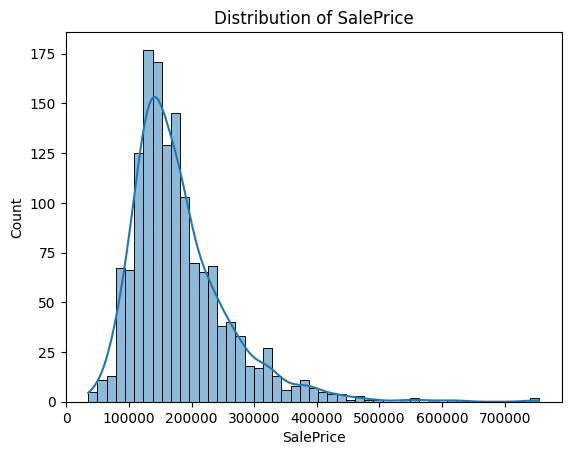

SalePrice        1.000000
OverallQual      0.797881
GrLivArea        0.705154
GarageCars       0.647034
GarageArea       0.619330
TotalBsmtSF      0.615612
1stFlrSF         0.607969
FullBath         0.566627
TotRmsAbvGrd     0.547067
YearBuilt        0.525394
YearRemodAdd     0.521253
GarageYrBlt      0.504753
MasVnrArea       0.488658
Fireplaces       0.461873
BsmtFinSF1       0.390301
LotFrontage      0.344270
OpenPorchSF      0.343354
WoodDeckSF       0.336855
2ndFlrSF         0.306879
LotArea          0.299962
HalfBath         0.268560
BsmtFullBath     0.236737
BsmtUnfSF        0.213129
BedroomAbvGr     0.166814
EnclosedPorch    0.154843
KitchenAbvGr     0.140497
OverallCond      0.124391
ScreenPorch      0.110427
PoolArea         0.092488
MSSubClass       0.088032
MoSold           0.051568
Id               0.047122
BsmtHalfBath     0.036513
MiscVal          0.036041
3SsnPorch        0.030777
BsmtFinSF2       0.028021
YrSold           0.011869
LowQualFinSF     0.001482
Name: SalePr

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the training and testing datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Exploratory Data Analysis (EDA) - only for the training data
print(train_data.info())
print(train_data.describe())
print(train_data.isnull().sum())
sns.histplot(train_data["SalePrice"], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

# Data Cleaning - only for the training data
# Drop rows with missing values in columns that are critical for the analysis
critical_columns = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]
train_data.dropna(subset=critical_columns, inplace=True)

# Feature Selection - only for the training data
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
correlations = train_data[numeric_columns].corr()["SalePrice"].abs().sort_values(ascending=False)
print(correlations)
selected_features = correlations[correlations > 0.5].index.tolist()
selected_features = [feature for feature in selected_features if feature in test_data.columns]

# Split Data for Training and Testing - only for the training data
X_train = train_data[selected_features]
y_train = train_data["SalePrice"]
X_test = test_data[selected_features]  # Use selected features from training data for testing as well

# Develop a Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
from sklearn.impute import SimpleImputer

# Impute missing values in the test dataset
imputer = SimpleImputer(strategy="mean")
X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

# Predict on the imputed test set
y_pred = model.predict(X_test_imputed)

# Save predictions to a CSV file
predictions = pd.DataFrame({"Id": test_data["Id"], "SalePrice": y_pred})
predictions.to_csv("predictions.csv", index=False)

print("Predictions saved to predictions.csv")

predictions_df = pd.read_csv("predictions.csv")

# Print the DataFrame
print(predictions_df)

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


1. Original Pretraining Data Sources: BERT differs from conventional neural networks as it was pre-trained on huge text corpus containing books (800 million words) and Wikipedia (2.5 billion words) on the web. The pre-training task was compositional of two components: masked language modeling (MLM) and next sentence prediction (NSP), what enabled BERT to learn contextualized word and sentence representations.

  Number of Parameters: The BERT-base model utilized in the script ("bert-base-uncased") contains 110 million parameters which are elements that the model uses to process data. There are also the large ones like BERT-large (340 million parameters) implemented in the script, but we are using the smaller one BERT-base in this case.

  Task-Specific Fine-Tuning: The script involves BERT for the sentiment analysis task on which it is fine-tuned. Fine-tuning means tasking the pre-trained BERT model to skim through the "sentimental_reviews.csv" set of dataset and thereafter adapting the BERT to the sentiment classification problem. In fine-tuning step, the weights of pre-trained BERT model are gradually adjusted according to the target data and objective, so the model will have the ability to learn those special features of the task and enhances the ability to predict the sentimental polarities.
  



3. Advantages:

  Contextual Understanding: The aptitude of BERT to supply contextual information from text is especially significant because it is imperative for the comprehending of the sentiment. It involves multiple components, sentences and not only isolated words. Therefore, it leads to a greater accuracy.

  Pre-trained Representations: BERT is pre-trained on a big array of text that involves the whole range of subjects such as (ex. Wikipedia and instructions) in the start. To be more precise, the ability of BERT to pretrain allows to create a system of more advanced language representations which are utilized in a variety of downstream tasks, namely, in the sentiment analysis.

  Disadvantages:

  Computational Resources: For instance, developing BERT and especially its large-scale models like BERT-large is extremely complex and requires considerable training and inference resources. Fine tuning batch generation experiments need lots of expensive computing time.

  Model Size: BERT model has a high number of parameters that can cause deployment challenges in the limited resources environment such as mobile devices and edge devices.

  Domain Specificity: The fact it is supposed to be trained on a couple of datasets may affect the task success rate, as it could be different from a certain domain. More frequently than not, it is required of you to adjust the model on problems related to some domains, if you want to be able to get the best results when it comes to particular cases.

  Challenges Encountered During Implementation:
  
  Data Preprocessing: Proper tokenization, padding, truncation of the data is becoming a necessity when it comes to dealing with large datasets or speech texts will need very cautious handling.

  Model Selection: A suitable selection of BERT models (BERT-base, BERT-large) and fine tuning strategies, together with a trial and error model, may be a challenge and will likely require some trial and error to achieve the best outcomes.

  Evaluation Metrics: The selection of metrics and comprehension of results are generally challenging. What is foremost is that these challenges result from the absence of ground-truth labels or imbalanced data sets most of the time.

  Resource Constraints: The variety of such computational infrastructure may limit the BERT application in its training, deployment and fine-tuning processes as well as during the production system implementation.


In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("sentimental_reviews.csv")

# Extract texts and labels
texts = df["Review Title"].tolist()
labels = df["sentiment_category"].tolist()

# Convert labels to lowercase
labels = [label.lower() for label in labels]

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize input texts
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# Forward pass through the model
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted labels
predicted_labels = torch.argmax(outputs.logits, dim=1)

# Convert predicted labels to text labels
label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
predicted_labels_text = [label_map[label.item()] for label in predicted_labels]

# Evaluate metrics
accuracy = accuracy_score(labels, predicted_labels_text)
precision = precision_score(labels, predicted_labels_text, average='weighted')
recall = recall_score(labels, predicted_labels_text, average='weighted')
f1 = f1_score(labels, predicted_labels_text, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.367
Precision: 0.13482382382382382
Recall: 0.367
F1-score: 0.19720204978038067


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
